# Visualizations

### Imports

In [133]:
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from scipy.misc import imread
import imageio
import pandas as pd
import regex as re
from bs4 import BeautifulSoup 

%matplotlib inline

### Functions I'll be using in this Notebook

In [134]:
#Instantiating our lemmatizer
lemmatizer = WordNetLemmatizer()

#This function will manually clean any string that it receives as an input using beautifuls soup,
#regex, lemmatization, and stopwords.
def clean_text_full(string):
        #This will remove most HTML artifacts in the text
        cleaned_json = BeautifulSoup(string).get_text()
        #This regular expression will remve all punctuation and numbers from our string
        letters_only = re.sub("[^a-zA-Z]", " ", cleaned_json)
        #This line will format the string into lower case, then split it along spaces
        words = letters_only.lower().split()
        # Creating a stops variable that includes all the common english stopwords along with some 
        # That are specifically for my subreddits (these words specifically occur extremely frequently in
        # Both subreddits so they likely have a negative impact on model score.
        stops = set(stopwords.words('english') + ['climate', 'change', 'http', 'www', 'would', 'people'])
        # Take our words and create a variable that ONLY includes words that weren't in our stop words
        meaningful_words = [w for w in words if not w in stops]
        # Lemmatize the our meaningul words, hopefully allowing for more meaningful and impactful 
        lemmatized_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
        # Finally, join our lemmatized words, adding a space between each word, then return the result.
        return (" ".join(lemmatized_words))
    

#This function will also manually clean any string that it receives, but it will just use regular
#expressions and beautiful soup. No stop words or lemmatization in this function.
def clean_text_partial(string):
    #This will remove most HTML artifacts in the text
    cleaned_json = BeautifulSoup(string).get_text()
    #This regular expression will remve all punctuation and numbers from our string
    letters_only = re.sub("[^a-zA-Z]", " ", cleaned_json)
    #This line will format the string into lower case, then split it along spaces
    words = letters_only.lower().split()
    #Return the cleaned string.
    return (" ".join(words))
        

## Prepping Data for Wordclouds

In [135]:
climate_skeptics = './data/climateskeptics_cleaned.csv'
climate_change = './data/climatechange_cleaned.csv'
skeptics = pd.read_csv(climate_skeptics)
change = pd.read_csv(climate_change)

In [136]:
# This code taken directly from code used by Charlie Rice
# Setting up stopwords for future use
stop = stopwords.words('english')
punct = {'"', "'", '.', ',', '-', '--', '!', ';', '?', ':', '(', ')', '``', "''", '``'}
stop = {x.lower() for x in stop}
stop = stop|punct

In [144]:
change.head()

,post_title,post_text,subreddit,combined_text
0,Subreddit rules,Reddit's new look doesn't display the sidebar ...,climatechange,Subreddit rules Reddit's new look doesn't disp...
1,I'm afraid climate change is going to kill me!...,Feeling scared? Have you been listening to or ...,climatechange,I'm afraid climate change is going to kill me!...
2,"As Water Scarcity Increases, Desalination Plan...",,climatechange,"As Water Scarcity Increases, Desalination Plan..."
3,Scientists have developed an interactive map d...,,climatechange,Scientists have developed an interactive map d...
4,"Debunking ""climate skeptics,"" part 1. There is...",Hi guys! I'm thinking about making a series of...,climatechange,"Debunking ""climate skeptics,"" part 1. There is..."


In [143]:
skeptics.head()

,post_title,post_text,subreddit,combined_text
0,2007 NASA: Arctic Ice Free By 2013!!,,climateskeptics,2007 NASA: Arctic Ice Free By 2013!!
1,Climate Hype is a Cover Up,,climateskeptics,Climate Hype is a Cover Up
2,"These are the suggestions when you type in ""cl...",,climateskeptics,"These are the suggestions when you type in ""cl..."
3,chernobyl miniseries is global warming propaganda,"i thought it was anti-nuclear propaganda, whic...",climateskeptics,chernobyl miniseries is global warming propaga...
4,Is climate alarmism racist?,,climateskeptics,Is climate alarmism racist?


In [138]:
#creating 'combined_text' columns for both of these dataframes
change['combined_text'] = change['post_title'] + " " + change['post_text']
skeptics['combined_text'] = skeptics['post_title'] + " " + skeptics['post_text']

In [139]:
#Instantiating Lemmatizer
lemmatizer = WordNetLemmatizer()

#Instatiating our Corpus Lists
fully_cleaned_change = []
fully_cleaned_skeptics = []
partially_cleaned_change = []
partially_cleaned_skeptics = []

#Now let's fill those lists with squeaky clean text

for combined_text in change['combined_text']:
    fully_cleaned_change.append(clean_text_full(combined_text))
print("Done!")

for combined_text in skeptics['combined_text']:
    fully_cleaned_skeptics.append(clean_text_full(combined_text))
print("Done!")

for combined_text in change['combined_text']:
    partially_cleaned_change.append(clean_text_partial(combined_text))
print("Done!")

for combined_text in skeptics['combined_text']:
    partially_cleaned_skeptics.append(clean_text_partial(combined_text))
print("Done!")


Done!
Done!
Done!
Done!


In [140]:
#Creating a new variable where we join these lists back together into massive strings. I'm doing this for
#The purpose of word clouds.
fully_cleaned_change_str = " ".join(fully_cleaned_change)
fully_cleaned_skeptics_str = " ".join(fully_cleaned_change)
partially_cleaned_change_str = " ".join(partially_cleaned_change)
partially_cleaned_skeptics_str = " ".join(partially_cleaned_skeptics)

# Wordcloud Generation

<Figure size 432x288 with 0 Axes>

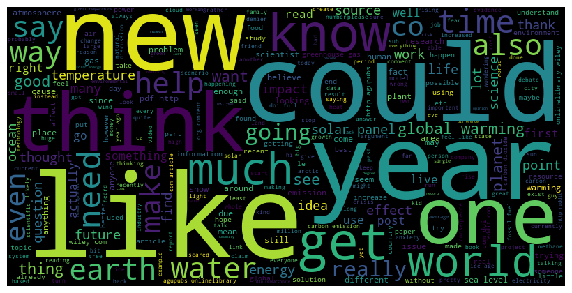

<Figure size 432x288 with 0 Axes>

In [152]:
#Here's a wordcloud with our fully-cleaned /r/climatechange wordlist
wc = WordCloud(width=800, height=400, max_words = 300, stopwords=stop)

wc.generate_from_text(fully_cleaned_change_str)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/fully_cleaned_change.jpg', quality=400, dpi=400)
plt.figure()

<Figure size 432x288 with 0 Axes>

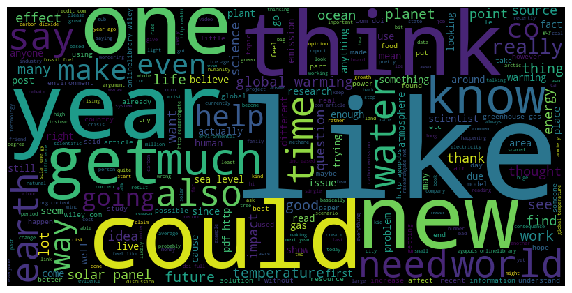

<Figure size 432x288 with 0 Axes>

In [153]:
#Here's a wordcloud with our /r/climateskeptics fully cleaned wordlist
wc = WordCloud(width=800, height=400, max_words = 300, stopwords=stop)

wc.generate_from_text(fully_cleaned_skeptics_str)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/fully_cleaned_skeptics.jpg', quality=400, dpi=400)
plt.figure()

<Figure size 432x288 with 0 Axes>

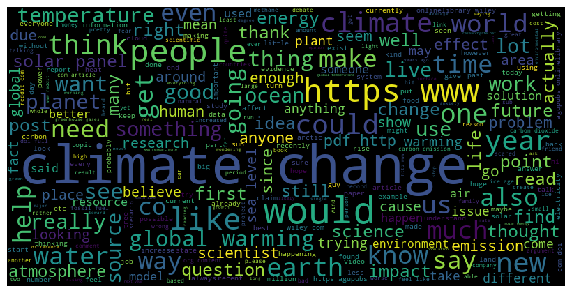

<Figure size 432x288 with 0 Axes>

In [106]:
#Here's a wordcloud with our partially cleaned /r/climatechange wordlist
wc = WordCloud(width=800, height=400, max_words = 300, stopwords=stop)

wc.generate_from_text(partially_cleaned_change_str)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/partial_clean_change.jpg', quality=400, dpi=400)
plt.figure()

<Figure size 432x288 with 0 Axes>

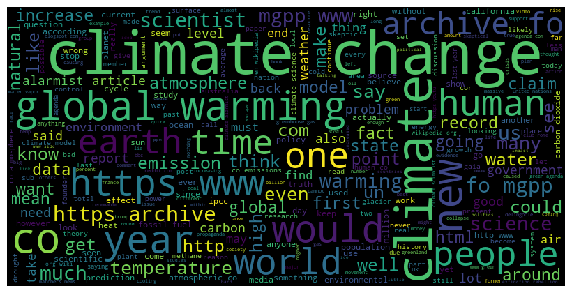

<Figure size 432x288 with 0 Axes>

In [107]:
#Here's a wordcloud with our partally leaned /r/climateskeptics wordlist
wc = WordCloud(width=800, height=400, max_words = 300, stopwords=stop)

wc.generate_from_text(partially_cleaned_skeptics_str)

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/partial_clean_skeptics_wc.jpg', quality=400, dpi=400)
plt.figure()

In [75]:
earth_mask = imageio.imread('./assets/earth.jpg')

<Figure size 432x288 with 0 Axes>

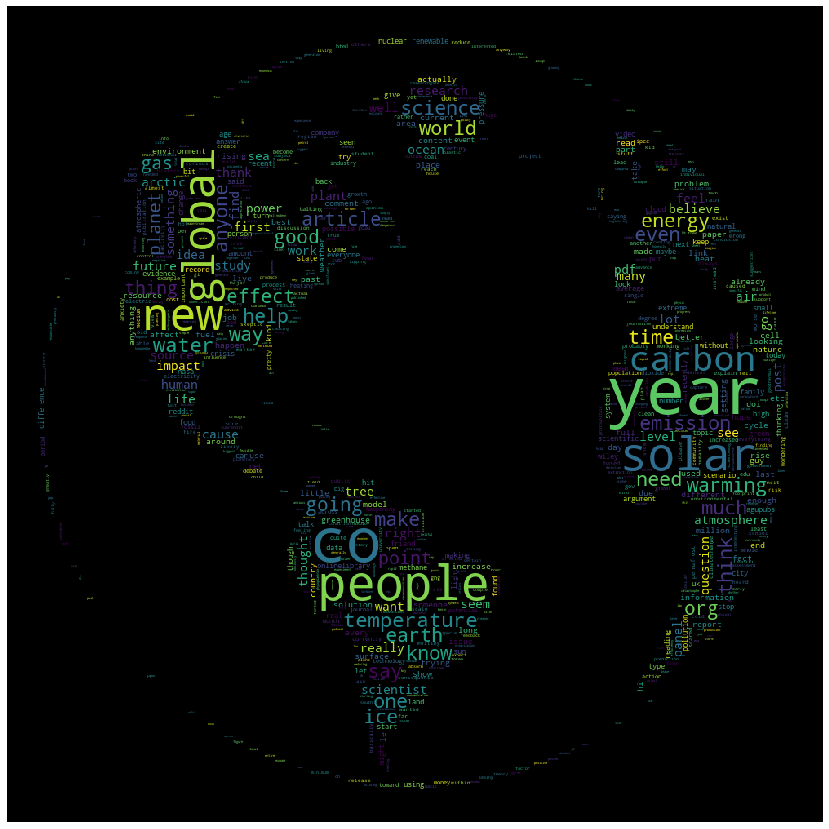

<Figure size 432x288 with 0 Axes>

In [78]:
#This code adapted heavily from Charlie Rice's code
#Just for fun and to create a visually distinct representation of our words, here is a more fun wordcloud for
#the cleaned words in /r/climatechange
wc = WordCloud(background_color='black', stopwords=STOPWORDS, max_words=5000, mask=earth_mask, collocations=False)

wc.generate_from_text(fully_cleaned_change_str)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/change_earth_wc.jpg', quality=200, dpi=250)
plt.figure()

In [93]:
denial_mask = imageio.imread('./assets/climate_denial.jpeg')

<Figure size 432x288 with 0 Axes>

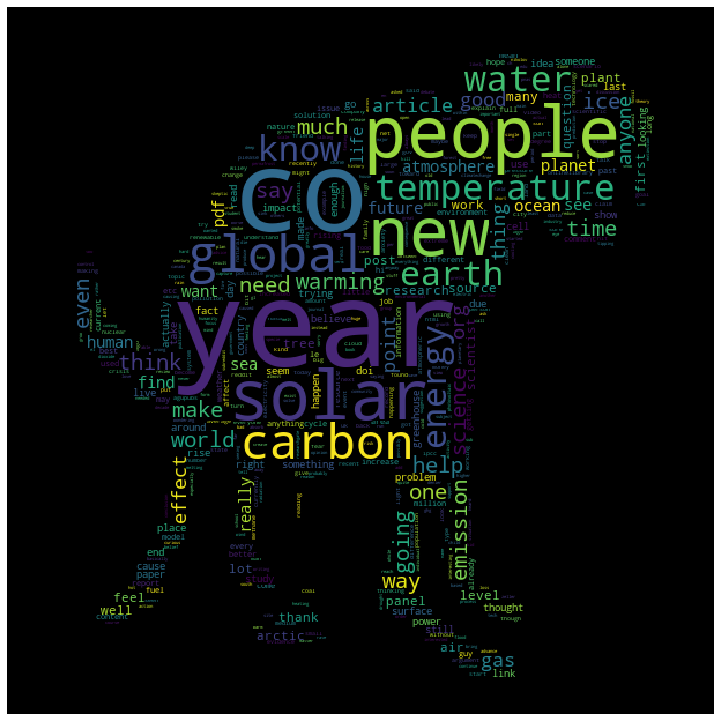

<Figure size 432x288 with 0 Axes>

In [100]:
#This code adapted heavily from Charlie Rice's code
#And here's one for /r/climateskeptics...
wc = WordCloud(background_color='black', stopwords=STOPWORDS, max_words=5000, mask=denial_mask, collocations=False)

wc.generate_from_text(fully_cleaned_change_str)

plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./assets/denial_refuse_wc.jpg', quality=400, dpi=400)
plt.figure()